In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sys
import os
import cmocean
import cmocean.cm as cmo

In [2]:
os.path.exists

<function genericpath.exists(path)>

In [37]:
full_df = pd.DataFrame()
cols = ['Trial', "tr_mse", 'te_mse']

basic = 0.0001
equiv = 1e-5
fname = "./saved-outputs/log_basic" + str(basic) + "_equiv" + str(equiv) + ".pkl"
rpp_df = pd.read_pickle(fname)
rpp_df.columns = cols
rpp_df['type'] = 'RPP'
full_df = pd.concat((full_df, rpp_df))

fname = "./saved-outputs/mlplog_basic0.0001_equiv0.0001.pkl"
mlp_df = pd.read_pickle(fname)
mlp_df.columns = cols
mlp_df['type'] = "MLP"
full_df = pd.concat((full_df, mlp_df))


fname = "./saved-outputs/emlplog_basic0.0001_equiv0.0001.pkl"
emlp_df = pd.read_pickle(fname)
emlp_df.columns = cols
emlp_df['type'] = "EMLP"
full_df = pd.concat((full_df, emlp_df))

In [38]:
full_df.groupby('type').mean()

,Trial,tr_mse,te_mse
type,,,
EMLP,4.5,0.000503,0.000571
MLP,4.5,0.000615,0.000936
RPP,4.5,0.000207,0.000361


In [39]:
full_df['log_te_mse'] = np.log(full_df['te_mse'])

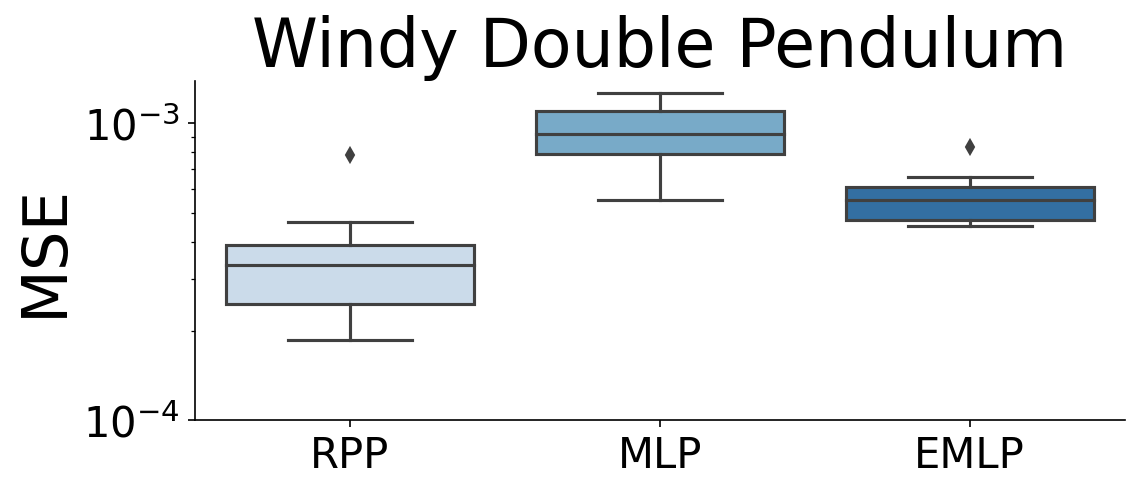

In [40]:
cpal = sns.color_palette("cmo.matter", n_colors=3)

fs = 30

fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 3))
sns.boxplot(x='type', y='te_mse', data=full_df, palette="Blues", ax=ax)
ax.set_xlabel("", fontsize=fs)
ax.set_ylabel("MSE", fontsize=fs)
ax.tick_params("both", labelsize=fs-10)
ax.semilogy()
# ax.set_yticklabels([])
ax.set_yticks([1e-4, 1e-3])
ax.set_yticklabels([r"$10^{-4}$", r"$10^{-3}$"])
# ax.semilogy()
ax.set_title("Windy Double Pendulum", fontsize=fs+2)
sns.despine()
plt.savefig("./partial_sym_pendulum.pdf", bbox_inches='tight')
plt.show()

## Pendulum Data

In [22]:
full_df = pd.DataFrame()
cols = ['Trial', "tr_mse", 'te_mse']

basic = 1.
equiv = 1e-05
fname = "./saved-outputs/inertia_log_MixedEMLP_basic" + str(basic) + "_equiv" + str(equiv) + ".pkl"
rpp_df = pd.read_pickle(fname)
rpp_df.columns = cols
rpp_df['type'] = 'RPP'
full_df = pd.concat((full_df, rpp_df))

fname = "./saved-outputs/inertia_log_mlp_basic100.0_equiv0.001.pkl"
mlp_df = pd.read_pickle(fname)
mlp_df.columns = cols
mlp_df['type'] = "MLP"
full_df = pd.concat((full_df, mlp_df))


fname = "./saved-outputs/inertia_log_emlp_basic100.0_equiv0.001.pkl"
emlp_df = pd.read_pickle(fname)
emlp_df.columns = cols
emlp_df['type'] = "EMLP"
full_df = pd.concat((full_df, emlp_df))

In [23]:
full_df['log_te_mse'] = np.log(full_df['te_mse'])

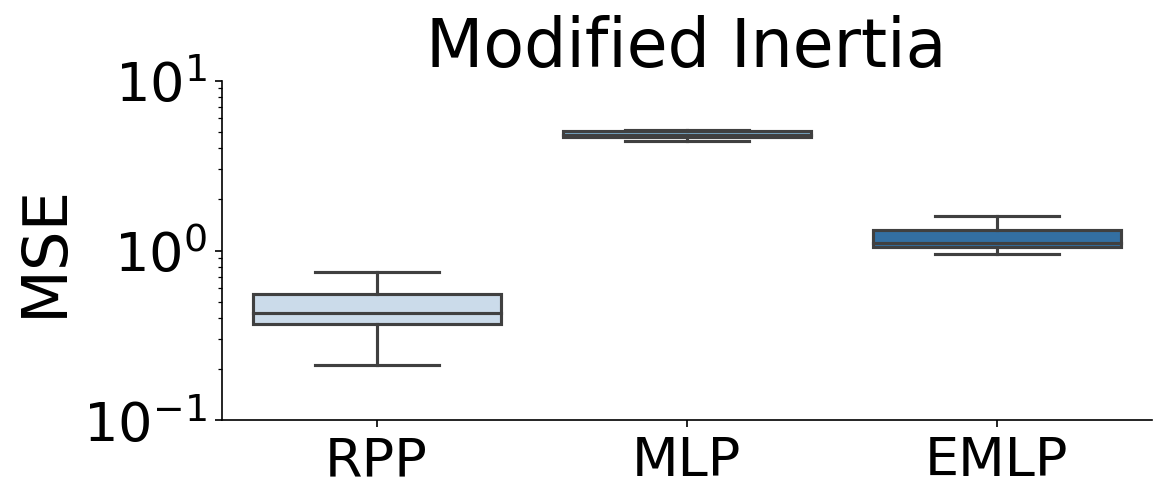

In [24]:
cpal = sns.color_palette("cmo.matter", n_colors=3)

fs = 30

fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 3))
sns.boxplot(x='type', y='te_mse', data=full_df, palette="Blues", ax=ax,
           showfliers=False)
ax.set_xlabel("", fontsize=fs)
ax.set_ylabel("MSE", fontsize=fs)
ax.tick_params("both", labelsize=fs-4)
ax.set_title("Modified Inertia", fontsize=fs+2)
ax.semilogy()
ax.set_yticks([0.1, 1., 10.])
ax.set_yticklabels([r"$10^{-1}$", r"$10^{0}$", r"$10^{1}$"])
sns.despine()
plt.savefig("./partial_sym_inertia.pdf", bbox_inches='tight')
plt.show()